In [1]:
# pip install mlxtend #un-comment to run install if running for first time.
# !pip install scikit-learn

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("diabetic_data.csv",header=None)
df.columns = ['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'payer_code', 'medical_specialty', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamid', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'
]
df.drop(index=df.index[0], axis=0, inplace=True)

data = df.copy()
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns")
print(data.describe())
print(data.head())
print(data.dtypes.value_counts())

C:\Users\mattj\AppData\Local\Temp\ipykernel_7304\3065116560.py:1: DtypeWarning: Columns (0,1,6,7,8,9,12,13,14,15,16,17,21) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("diabetic_data.csv",header=None)


The dataset has 101766 rows and 50 columns
       encounter_id  patient_nbr       race  gender      age  weight  \
count        101766       101766     101766  101766   101766  101766   
unique       101766        73399          6       3       10      10   
top         2278392     88785891  Caucasian  Female  [70-80)       ?   
freq              1           40      76099   54708    26068   98569   

        admission_type_id  discharge_disposition_id  admission_source_id  \
count              101766                    101766               101766   
unique                 15                        44                   27   
top                     1                         1                    7   
freq                45934                     51546                49209   

        time_in_hospital  ... citoglipton insulin  glyburide-metformin  \
count             101766  ...      101766  101766               101766   
unique                28  ...           1       4                  

In [4]:
data['weight'] = pd.to_numeric(data['weight'],errors='coerce') # weight in pounds
data['time_in_hospital'] = pd.to_numeric(data['time_in_hospital'],errors='coerce') # number of days between admission and discharge
data['num_lab_procedures'] = pd.to_numeric(data['num_lab_procedures'],errors='coerce') # number of lab test during the encounter
data['num_procedures'] = pd.to_numeric(data['num_procedures'],errors='coerce') # number of procedures other than lab test, during the encounter
data['num_medications'] = pd.to_numeric(data['num_medications'],errors='coerce') # number of distinct generic names administered during the encounter
data['number_outpatient'] = pd.to_numeric(data['number_outpatient'],errors='coerce') # number of outpatient visits in the year preceding the encounter
data['number_emergency'] = pd.to_numeric(data['number_emergency'],errors='coerce') # number of emergency visits in the year preceding the encounter
data['number_inpatient'] = pd.to_numeric(data['number_inpatient'],errors='coerce') # number of inpatient visits in the year preceding the encounter
data['number_diagnoses'] = pd.to_numeric(data['number_diagnoses'],errors='coerce') # number of diagnoses entered to the system 

In [5]:
print(data.dtypes.value_counts())

object     41
int64       8
float64     1
Name: count, dtype: int64


In [6]:
numeric_attributes = data.columns[data.dtypes!="object"]
categorical_attributes =data.columns[data.dtypes=="object"]
print(numeric_attributes)
print(categorical_attributes)

Index(['weight', 'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses'],
      dtype='object')
Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'payer_code', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamid', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')


# Handling Missing Values

## Approach C - Replacing missing values with a user defined constant

In [7]:
print('Before replacing missing values:')
data.head(20)

Before replacing missing values:


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
2,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
3,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
4,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
5,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
6,35754,82637451,Caucasian,Male,[50-60),NaN,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
7,55842,84259809,Caucasian,Male,[60-70),NaN,3,1,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
8,63768,114882984,Caucasian,Male,[70-80),NaN,1,1,7,5,...,No,No,No,No,No,No,No,No,Yes,>30
9,12522,48330783,Caucasian,Female,[80-90),NaN,2,1,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
10,15738,63555939,Caucasian,Female,[90-100),NaN,3,3,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


### Replacing missing values with a user defined constant

In [8]:
data_1 = data.copy()
data_1 = data_1.fillna("?")
data_1 = data_1.replace("?", pd.NA)

### Changing current values with a user defined constant

In [9]:
data_1["admission_type_id"] = data_1["admission_type_id"].replace("1", "Emergency")
data_1["admission_type_id"] = data_1["admission_type_id"].replace("2", "Urgent")
data_1["admission_type_id"] = data_1["admission_type_id"].replace("3", "Elective")
data_1["admission_type_id"] = data_1["admission_type_id"].replace("4", "Newborn")
data_1["admission_type_id"] = data_1["admission_type_id"].replace("5", "Trauma Center")
data_1["admission_type_id"] = data_1["admission_type_id"].replace("6", "Transfer")
data_1["admission_type_id"] = data_1["admission_type_id"].replace("7", "Hospice")
data_1["admission_type_id"] = data_1["admission_type_id"].replace("8", "Unknown")

data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace("1", "Home")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace("2", "Short Term Hospital")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace("3", "SNF")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace("4", "ICF")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace("5", "Inpatient Care")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace("6", "Home w/ Home Health Service")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace("7", "Left Against Medical Advice")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace("8", "Home Under Care")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace("9", "Admitted as an inpatient")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace("10", "Nenonate Discharge/Neonatal Aftercare")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace("11", "Expired")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace("12", "Expected Return for Outpatient Services")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace("13", "Hospice/Home")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace("14", "Hospice/Medical Facility")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace("15", "Medicare-approved Swing Bed")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace("16", "Transferred for Outpatient Services")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace("17", "Referred for Outpatient Services")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace("18", "NULL")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace("19", "Expired at Home")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace("20", "Expired at Medical facility")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace("21", "Expired, Place Unknown")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace("22", "Rehabilitation Facility")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace("23", "Long Term Care")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace("24", "Nursing Facility-Medicaid Certified")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace("25", "Not Mapped")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace("26", "Unknown/Invalid")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace("27", "Federal Health Facility")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace("28", "Psychiatric Hospital/Unit")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace("29", "Critical Access Hospital")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace("30", "Health Care Facility not Defined Elsewhere")

# data_1["A1Cresult"] = data_1["A1Cresult"].replace(">7", "Moderate Risk")
# data_1["A1Cresult"] = data_1["A1Cresult"].replace(">8", "High Risk")


print('\After replacing missing values:')
data_1.head(50)

\After replacing missing values:


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,2278392,8222157,Caucasian,Female,[0-10),<NA>,Transfer,Not Mapped,1,1,...,No,No,No,No,No,No,No,No,No,NO
2,149190,55629189,Caucasian,Female,[10-20),<NA>,Emergency,Home,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
3,64410,86047875,AfricanAmerican,Female,[20-30),<NA>,Emergency,Home,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
4,500364,82442376,Caucasian,Male,[30-40),<NA>,Emergency,Home,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
5,16680,42519267,Caucasian,Male,[40-50),<NA>,Emergency,Home,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
6,35754,82637451,Caucasian,Male,[50-60),<NA>,Urgent,Home,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
7,55842,84259809,Caucasian,Male,[60-70),<NA>,Elective,Home,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
8,63768,114882984,Caucasian,Male,[70-80),<NA>,Emergency,Home,7,5,...,No,No,No,No,No,No,No,No,Yes,>30
9,12522,48330783,Caucasian,Female,[80-90),<NA>,Urgent,Home,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
10,15738,63555939,Caucasian,Female,[90-100),<NA>,Elective,SNF,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


## Approach A - Removal of rows containing missing values

In [10]:
print(f"There are {data_1.isnull().sum().sum()} missing values in this dataset")

print('Number of instances = %d'%(data_1.shape[0]))
print('Number of attributes = %d'%(data_1.shape[1]))

print('Number of missing values:')
for col in data_1.columns:
    print('\t%s:%d'%(col,data_1[col].isna().sum()))

data_1.head(20)

There are 377214 missing values in this dataset
Number of instances = 101766
Number of attributes = 50
Number of missing values:
	encounter_id:0
	patient_nbr:0
	race:2273
	gender:0
	age:0
	weight:101766
	admission_type_id:0
	discharge_disposition_id:0
	admission_source_id:0
	time_in_hospital:0
	payer_code:40256
	medical_specialty:49949
	num_lab_procedures:0
	num_procedures:0
	num_medications:0
	number_outpatient:0
	number_emergency:0
	number_inpatient:0
	diag_1:21
	diag_2:358
	diag_3:1423
	number_diagnoses:0
	max_glu_serum:96420
	A1Cresult:84748
	metformin:0
	repaglinide:0
	nateglinide:0
	chlorpropamide:0
	glimepiride:0
	acetohexamide:0
	glipizide:0
	glyburide:0
	tolbutamide:0
	pioglitazone:0
	rosiglitazone:0
	acarbose:0
	miglitol:0
	troglitazone:0
	tolazamid:0
	examide:0
	citoglipton:0
	insulin:0
	glyburide-metformin:0
	glipizide-metformin:0
	glimepiride-pioglitazone:0
	metformin-rosiglitazone:0
	metformin-pioglitazone:0
	change:0
	diabetesMed:0
	readmitted:0


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,2278392,8222157,Caucasian,Female,[0-10),<NA>,Transfer,Not Mapped,1,1,...,No,No,No,No,No,No,No,No,No,NO
2,149190,55629189,Caucasian,Female,[10-20),<NA>,Emergency,Home,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
3,64410,86047875,AfricanAmerican,Female,[20-30),<NA>,Emergency,Home,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
4,500364,82442376,Caucasian,Male,[30-40),<NA>,Emergency,Home,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
5,16680,42519267,Caucasian,Male,[40-50),<NA>,Emergency,Home,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
6,35754,82637451,Caucasian,Male,[50-60),<NA>,Urgent,Home,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
7,55842,84259809,Caucasian,Male,[60-70),<NA>,Elective,Home,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
8,63768,114882984,Caucasian,Male,[70-80),<NA>,Emergency,Home,7,5,...,No,No,No,No,No,No,No,No,Yes,>30
9,12522,48330783,Caucasian,Female,[80-90),<NA>,Urgent,Home,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
10,15738,63555939,Caucasian,Female,[90-100),<NA>,Elective,SNF,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [11]:
data_1 = data_1.dropna(subset=["race", "diag_1", "diag_2", "diag_3"])

In [12]:
print(f"There are {data_1.isnull().sum().sum()} missing values in this dataset")

print('Number of instances = %d'%(data_1.shape[0]))
print('Number of attributes = %d'%(data_1.shape[1]))

print('Number of missing values:')
for col in data_1.columns:
    print('\t%s:%d'%(col,data_1[col].isna().sum()))
    
print(data_1.describe())
print(data_1.head())

There are 360000 missing values in this dataset
Number of instances = 98053
Number of attributes = 50
Number of missing values:
	encounter_id:0
	patient_nbr:0
	race:0
	gender:0
	age:0
	weight:98053
	admission_type_id:0
	discharge_disposition_id:0
	admission_source_id:0
	time_in_hospital:0
	payer_code:38924
	medical_specialty:48318
	num_lab_procedures:0
	num_procedures:0
	num_medications:0
	number_outpatient:0
	number_emergency:0
	number_inpatient:0
	diag_1:0
	diag_2:0
	diag_3:0
	number_diagnoses:0
	max_glu_serum:92845
	A1Cresult:81860
	metformin:0
	repaglinide:0
	nateglinide:0
	chlorpropamide:0
	glimepiride:0
	acetohexamide:0
	glipizide:0
	glyburide:0
	tolbutamide:0
	pioglitazone:0
	rosiglitazone:0
	acarbose:0
	miglitol:0
	troglitazone:0
	tolazamid:0
	examide:0
	citoglipton:0
	insulin:0
	glyburide-metformin:0
	glipizide-metformin:0
	glimepiride-pioglitazone:0
	metformin-rosiglitazone:0
	metformin-pioglitazone:0
	change:0
	diabetesMed:0
	readmitted:0
       time_in_hospital  num_lab_pro

## Approach D - Removal of attributes containing missing values

In [13]:
print('Number of missing values:')
for col in data_1.columns:
    print('\t%s:%d'%(col,data_1[col].isna().sum()))

Number of missing values:
	encounter_id:0
	patient_nbr:0
	race:0
	gender:0
	age:0
	weight:98053
	admission_type_id:0
	discharge_disposition_id:0
	admission_source_id:0
	time_in_hospital:0
	payer_code:38924
	medical_specialty:48318
	num_lab_procedures:0
	num_procedures:0
	num_medications:0
	number_outpatient:0
	number_emergency:0
	number_inpatient:0
	diag_1:0
	diag_2:0
	diag_3:0
	number_diagnoses:0
	max_glu_serum:92845
	A1Cresult:81860
	metformin:0
	repaglinide:0
	nateglinide:0
	chlorpropamide:0
	glimepiride:0
	acetohexamide:0
	glipizide:0
	glyburide:0
	tolbutamide:0
	pioglitazone:0
	rosiglitazone:0
	acarbose:0
	miglitol:0
	troglitazone:0
	tolazamid:0
	examide:0
	citoglipton:0
	insulin:0
	glyburide-metformin:0
	glipizide-metformin:0
	glimepiride-pioglitazone:0
	metformin-rosiglitazone:0
	metformin-pioglitazone:0
	change:0
	diabetesMed:0
	readmitted:0


In [14]:
data_1.drop('weight', axis=1, inplace=True) # 98053 records with missing values, deemed unusable
data_1.drop('payer_code', axis=1, inplace=True) # 38924 records with missing values, deemed unusable
data_1.drop('medical_specialty', axis=1, inplace=True) # 48318 records with missing values, deemed un

In [15]:
print('Number of missing values after removal:')
for col in data_1.columns:
    print('\t%s:%d'%(col,data_1[col].isna().sum()))
    
data_1.head(20)

Number of missing values after removal:
	encounter_id:0
	patient_nbr:0
	race:0
	gender:0
	age:0
	admission_type_id:0
	discharge_disposition_id:0
	admission_source_id:0
	time_in_hospital:0
	num_lab_procedures:0
	num_procedures:0
	num_medications:0
	number_outpatient:0
	number_emergency:0
	number_inpatient:0
	diag_1:0
	diag_2:0
	diag_3:0
	number_diagnoses:0
	max_glu_serum:92845
	A1Cresult:81860
	metformin:0
	repaglinide:0
	nateglinide:0
	chlorpropamide:0
	glimepiride:0
	acetohexamide:0
	glipizide:0
	glyburide:0
	tolbutamide:0
	pioglitazone:0
	rosiglitazone:0
	acarbose:0
	miglitol:0
	troglitazone:0
	tolazamid:0
	examide:0
	citoglipton:0
	insulin:0
	glyburide-metformin:0
	glipizide-metformin:0
	glimepiride-pioglitazone:0
	metformin-rosiglitazone:0
	metformin-pioglitazone:0
	change:0
	diabetesMed:0
	readmitted:0


,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
2,149190,55629189,Caucasian,Female,[10-20),Emergency,Home,7,3,59,...,No,Up,No,No,No,No,No,Ch,Yes,>30
3,64410,86047875,AfricanAmerican,Female,[20-30),Emergency,Home,7,2,11,...,No,No,No,No,No,No,No,No,Yes,NO
4,500364,82442376,Caucasian,Male,[30-40),Emergency,Home,7,2,44,...,No,Up,No,No,No,No,No,Ch,Yes,NO
5,16680,42519267,Caucasian,Male,[40-50),Emergency,Home,7,1,51,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
6,35754,82637451,Caucasian,Male,[50-60),Urgent,Home,2,3,31,...,No,Steady,No,No,No,No,No,No,Yes,>30
7,55842,84259809,Caucasian,Male,[60-70),Elective,Home,2,4,70,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
8,63768,114882984,Caucasian,Male,[70-80),Emergency,Home,7,5,73,...,No,No,No,No,No,No,No,No,Yes,>30
9,12522,48330783,Caucasian,Female,[80-90),Urgent,Home,4,13,68,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
10,15738,63555939,Caucasian,Female,[90-100),Elective,SNF,4,12,33,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
11,28236,89869032,AfricanAmerican,Female,[40-50),Emergency,Home,7,9,47,...,No,Steady,No,No,No,No,No,No,Yes,>30


## Classification - Naive Bayes

### Create data subset

In [16]:
# Some work was tried to create subset first before changing category names, but errors happened that were not easy to fix.
# Changing category names first was a way to avoid the errors, and still keep the data integrity.
class_data_1 = data_1.copy()
class_data_1.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
2,149190,55629189,Caucasian,Female,[10-20),Emergency,Home,7,3,59,...,No,Up,No,No,No,No,No,Ch,Yes,>30
3,64410,86047875,AfricanAmerican,Female,[20-30),Emergency,Home,7,2,11,...,No,No,No,No,No,No,No,No,Yes,NO
4,500364,82442376,Caucasian,Male,[30-40),Emergency,Home,7,2,44,...,No,Up,No,No,No,No,No,Ch,Yes,NO
5,16680,42519267,Caucasian,Male,[40-50),Emergency,Home,7,1,51,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
6,35754,82637451,Caucasian,Male,[50-60),Urgent,Home,2,3,31,...,No,Steady,No,No,No,No,No,No,Yes,>30


#### Change category names

In [17]:
class_data_1["A1Cresult"] = class_data_1["A1Cresult"].replace(">7", "Moderate Risk")
class_data_1["A1Cresult"] = class_data_1["A1Cresult"].replace(">8", "High Risk")
class_data_1["A1Cresult"] = class_data_1["A1Cresult"].replace("Norm", "Normal")
class_data_1["A1Cresult"] = class_data_1["A1Cresult"].replace("None", pd.NA)

In [18]:
class_data_1 = class_data_1.dropna(subset=["A1Cresult"])

In [19]:
class_data_1.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
27,236316,40523301,Caucasian,Male,[80-90),Emergency,SNF,7,6,64,...,No,No,No,No,No,No,No,Ch,Yes,NO
75,955884,93196251,Caucasian,Female,[70-80),Emergency,SNF,7,5,34,...,No,Up,No,No,No,No,No,Ch,Yes,>30
99,1257282,84488562,Other,Female,[50-60),Emergency,Home,7,2,53,...,No,Up,No,No,No,No,No,Ch,Yes,NO
104,1270524,67897251,Caucasian,Male,[60-70),Emergency,Short Term Hospital,7,1,59,...,No,Steady,No,No,No,No,No,No,Yes,NO
108,1455252,96440301,Caucasian,Female,[80-90),Emergency,Home,7,3,34,...,No,No,No,No,No,No,No,No,No,>30


### Use Corrolellogram to Find Related Attributes

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Select categorical columns
categorical_columns = class_data_1.select_dtypes(include=['object']).columns

# Convert columns to strings if they are not already
class_data_1[categorical_columns] = class_data_1[categorical_columns].astype(str)

# Copy the original dataframe
processed_data = class_data_1.copy()

# Label encode categorical variables
label_encoder = LabelEncoder()
for col in categorical_columns:
    processed_data[col] = label_encoder.fit_transform(processed_data[col])

# Compute the correlation matrix
correlation_matrix = processed_data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 9))

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Add a title to the plot
plt.title('Correlation Matrix')

# Show the plot
plt.show()

In [ ]:
class_data_1 = class_data_1[['age','race','gender','admission_type_id','time_in_hospital','num_procedures','A1Cresult','diabetesMed']]

#### Create data copy for later if needed

In [ ]:
class_data_2 = class_data_1.copy()

#### Change data into correct format

##### Bin numerical data

In [ ]:
class_data_2.describe()

In [ ]:
time_in_hospital_bins = [0, 3, 7, 14]  # Define bin edges based on quartiles
class_data_2['time_in_hospital'] = pd.cut(class_data_2['time_in_hospital'], bins=time_in_hospital_bins, labels=["Low", "Medium", "High"])

In [ ]:
num_procedure_bins = [-0.1, 2.5, 6.1]  # Define bin edges based on quartiles
class_data_2['num_procedures'] = pd.cut(class_data_2['num_procedures'], bins=num_procedure_bins, labels=["Low", "High"])

In [ ]:
class_data_2.describe()

### Naive Bayes Classification

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
import seaborn as sns

X = class_data_2[['age','race','gender','admission_type_id','time_in_hospital','num_procedures','diabetesMed']]
Y = class_data_2['A1Cresult']

X_encoded = pd.get_dummies(X)

# Assign the Naive Bayes Classifier to a variable.
gnb = GaussianNB()

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, Y, test_size=0.2, random_state=42)

# Fit the classifier on the training data
gnb.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = gnb.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of Gaussian Naive Bayes classifier:', accuracy)


#### Naive Bayes Confusion Matrix

In [ ]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Get class labels
class_labels = gnb.classes_

# Plot confusion matrix using Seaborn with class labels
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=class_labels, yticklabels=class_labels)

# Add text annotations for each cell showing the exact number of predictions
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j + 0.5, i + 0.5, conf_matrix[i, j], ha='center', va='center', color='black')

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

### Decision Tree Classification

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Assign the Decision Tree Classifier to a variable
dt_classifier = DecisionTreeClassifier()

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, Y, test_size=0.2, random_state=42)

# Fit the classifier on the training data
dt_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = dt_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of Decision Tree classifier:', accuracy)

#### Decision Tree Confusion Matrix

In [ ]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Get class labels
class_labels = dt_classifier.classes_

# Plot confusion matrix using Seaborn with class labels
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=class_labels, yticklabels=class_labels)

# Add text annotations for each cell showing the exact number of predictions
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j + 0.5, i + 0.5, conf_matrix[i, j], ha='center', va='center', color='black')

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


### K-N-N Classification 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Assign the KNN classifier to a variable
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors as needed

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, Y, test_size=0.2, random_state=42)

# Fit the classifier on the training data
knn_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = knn_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of KNN classifier:', accuracy)

#### K-N-N Confusion Matrix

In [ ]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Get class labels
class_labels = knn_classifier.classes_

# Plot confusion matrix using Seaborn with class labels
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=class_labels, yticklabels=class_labels)

# Add text annotations for each cell showing the exact number of predictions
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j + 0.5, i + 0.5, conf_matrix[i, j], ha='center', va='center', color='black')

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

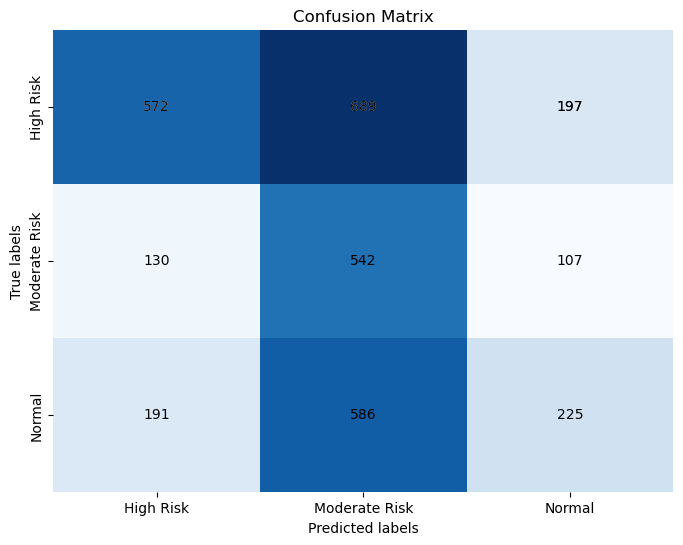

In [28]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Get class labels
class_labels = gnb.classes_

# Plot confusion matrix using Seaborn with class labels
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=class_labels, yticklabels=class_labels)

# Add text annotations for each cell showing the exact number of predictions
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j + 0.5, i + 0.5, conf_matrix[i, j], ha='center', va='center', color='black')

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

### Decision Tree Classification

In [33]:
from sklearn.tree import DecisionTreeClassifier

# Assign the Decision Tree Classifier to a variable
dt_classifier = DecisionTreeClassifier()

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, Y, test_size=0.2, random_state=42)

# Fit the classifier on the training data
dt_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = dt_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of Decision Tree classifier:', accuracy)

Accuracy of Decision Tree classifier: 0.468045693115159


#### Decision Tree Confusion Matrix

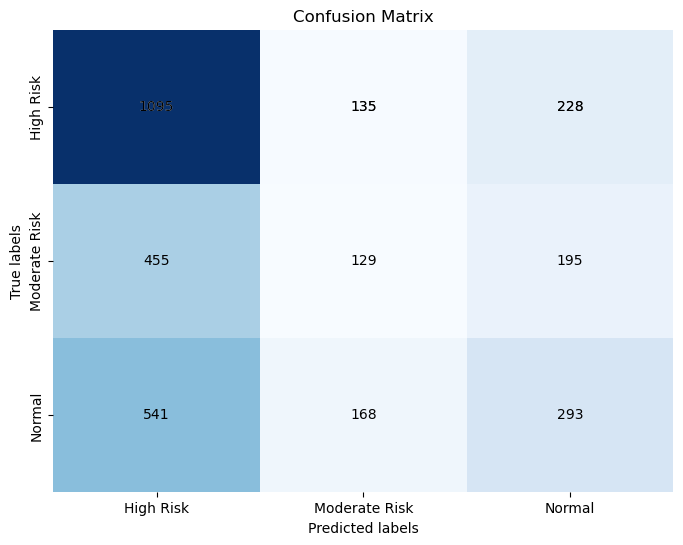

In [30]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Get class labels
class_labels = dt_classifier.classes_

# Plot confusion matrix using Seaborn with class labels
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=class_labels, yticklabels=class_labels)

# Add text annotations for each cell showing the exact number of predictions
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j + 0.5, i + 0.5, conf_matrix[i, j], ha='center', va='center', color='black')

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


### K-N-N Classification 

In [31]:
from sklearn.neighbors import KNeighborsClassifier

# Assign the KNN classifier to a variable
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors as needed

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, Y, test_size=0.2, random_state=42)

# Fit the classifier on the training data
knn_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = knn_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of KNN classifier:', accuracy)

Accuracy of KNN classifier: 0.43470206853967275


#### K-N-N Confusion Matrix

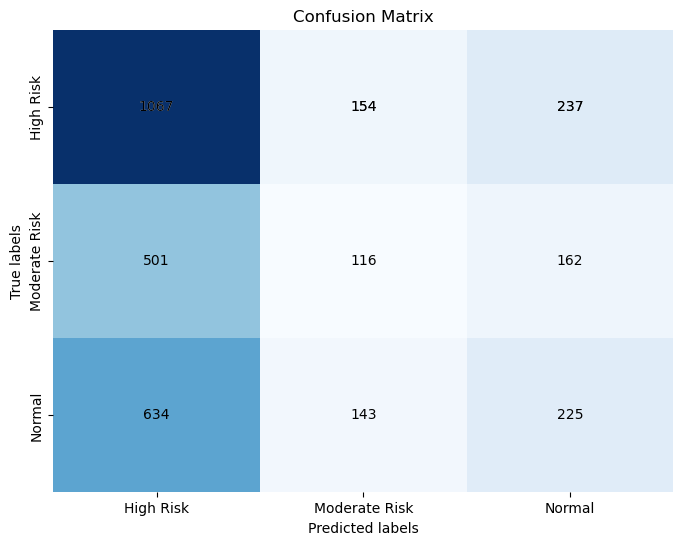

In [32]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Get class labels
class_labels = knn_classifier.classes_

# Plot confusion matrix using Seaborn with class labels
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=class_labels, yticklabels=class_labels)

# Add text annotations for each cell showing the exact number of predictions
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j + 0.5, i + 0.5, conf_matrix[i, j], ha='center', va='center', color='black')

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()